# Modelos lineales y regularizacion

In [1]:
import numpy as np

n=100
X = 2 * np.random.rand(n, 1)
y = 4 + 3 * X + np.random.randn(n, 1)

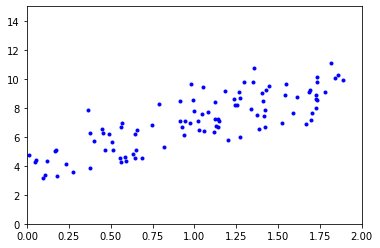

In [2]:
import matplotlib.pyplot as plt

plt.plot(X,y,'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [3]:
X_b = np.c_[np.ones((n, 1)), X] # add x0 = 1 to each instance
# w_hat 
w_hat = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
X_b.shape

(100, 2)

In [5]:
print(w_hat)

[[4.04671292]
 [2.9927079 ]]


In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(w_hat)

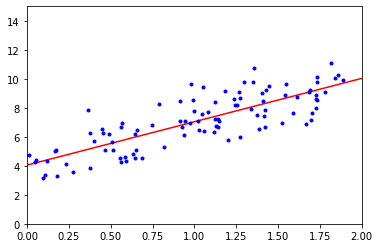

In [7]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print('Coeficientes Sklearn : ',lin_reg.intercept_, lin_reg.coef_)
print('Coeficientes Manual : ',w_hat)

Coeficientes Sklearn :  [4.04671292] [[2.9927079]]
Coeficientes Manual :  [[4.04671292]
 [2.9927079 ]]


# Regularizacion

In [9]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * np.sin(X) + np.random.randn(100, 1)

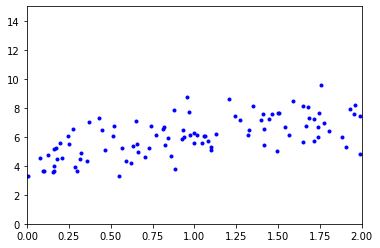

In [10]:
import matplotlib.pyplot as plt

plt.plot(X,y,'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2,interaction_only=False,include_bias=True)
poly.fit(X)
X_p=poly.transform(X)

In [12]:
X_p[0]

array([1.        , 1.75705675, 3.08724843])

In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
r2=lin_reg.score(X, y)
print('Coeficiente Determinacion :',r2)
print('Coeficientes Sklearn : ',lin_reg.intercept_, lin_reg.coef_)

Coeficiente Determinacion : 0.39007262277083776
Coeficientes Sklearn :  [4.56530569] [[1.48675753]]


In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_p, y)
r2=lin_reg.score(X_p, y)
print('Coeficientes Sklearn : ',lin_reg.intercept_, lin_reg.coef_)
print('Coeficiente Determinacion :',r2)

Coeficientes Sklearn :  [4.02462452] [[ 0.          3.1073279  -0.80935799]]
Coeficiente Determinacion : 0.42051678772550866


In [16]:
y_predict=lin_reg.predict(X_p)

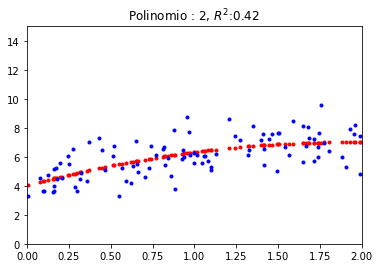

In [17]:
plt.plot(X_p[:,1], y_predict, "r.")
plt.plot(X,y,'b.')
plt.title(r'Polinomio : {0}, $R^2$:{1:0.2f}'.format(2,r2))
plt.axis([0, 2, 0, 15])
plt.show()

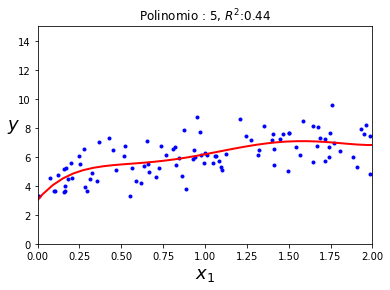

In [18]:
K=5
poly=PolynomialFeatures(degree=K,interaction_only=False,include_bias=True)
poly.fit(X)
X_p=poly.transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_p, y)
r2=lin_reg.score(X_p, y)
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.title(r'Polinomio : {0}, $R^2$:{1:0.2f}'.format(K,r2))
plt.show()

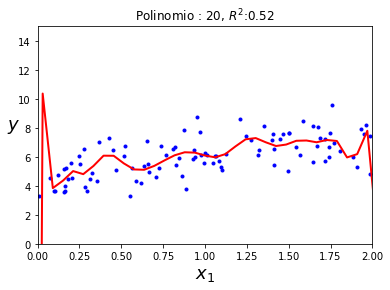

In [19]:
K=20
poly=PolynomialFeatures(degree=K,interaction_only=False,include_bias=True)
poly.fit(X)
X_p=poly.transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_p, y)
r2=lin_reg.score(X_p, y)
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.title(r'Polinomio : {0}, $R^2$:{1:0.2f}'.format(K,r2))
plt.show()

In [20]:
print(X_p.shape)

(100, 21)


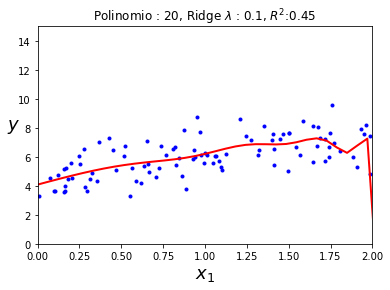

In [21]:
from sklearn.linear_model import Ridge

lamb=0.1
K=20

poly=PolynomialFeatures(degree=K,interaction_only=False,include_bias=True)
poly.fit(X)
X_p=poly.transform(X)

ridge_reg = Ridge(alpha=lamb, solver="cholesky", random_state=42)
ridge_reg.fit(X_p, y)
r2=ridge_reg.score(X_p, y)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly.transform(X_new)
y_new = ridge_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.title(r'Polinomio : {0}, Ridge $\lambda$ : {1}, $R^2$:{2:0.2f}'.
          format(K,lamb,r2))
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66.16127105687363, tolerance: 0.01892441780847124
  positive)


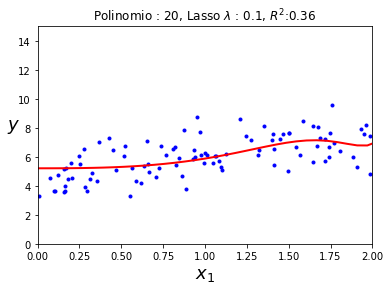

In [22]:
from sklearn.linear_model import Lasso

lamb=0.1
K=20

poly=PolynomialFeatures(degree=K,interaction_only=False,include_bias=True)
poly.fit(X)
X_p=poly.transform(X)

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_p, y)
r2=lasso_reg.score(X_p, y)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly.transform(X_new)
y_new = lasso_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.title(r'Polinomio : {0}, Lasso $\lambda$ : {1}, $R^2$:{2:0.2f}'.
          format(K,lamb,r2))
plt.show()

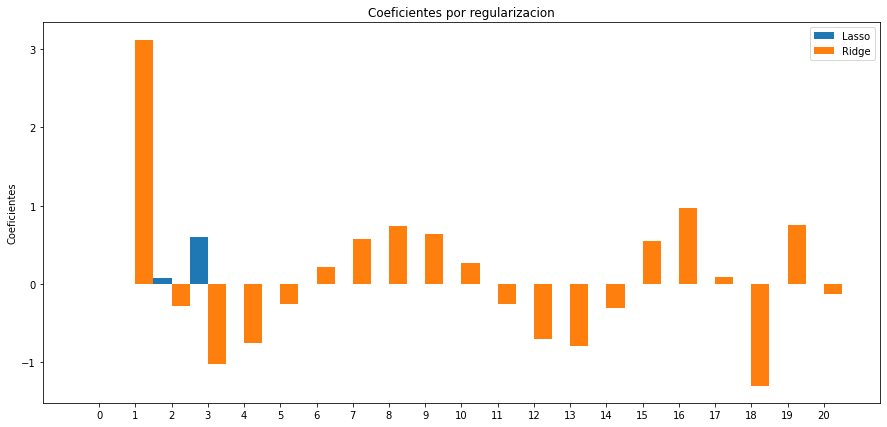

In [23]:
x = np.arange(len(lasso_reg.coef_))  # the label locations
width = 0.5  # the width of the bars
fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(x - width/2, lasso_reg.coef_, width, label='Lasso')
rects2 = ax.bar(x + width/2, ridge_reg.coef_[0], width, label='Ridge')
#rects3 = ax.bar(x + width/2, lin_reg.coef_[0], width, label='Linear')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes por regularizacion')
ax.set_xticks(x)
#ax.set_xticklabels(labels)
ax.legend()

# Tarea

En este laboratorio Ud debe completar las siguientes tareas:


1.   Implementar un modelo base para predecir el total de 'nuevos casos' a partir de las distintas vacunas y las medidas administradas en Chile.
2. Reportar la metrica de ajuste del modelo base.
3. Reportar la metrica de ajuste del modelo regularizacion.


In [31]:
import pandas as pd

data_cases = pd.read_csv(
    "https://storage.googleapis.com/covid19-open-data/v3/epidemiology.csv",
    keep_default_na=False,
    na_values=[""],
)

In [38]:
for i,c in enumerate(data_cases.columns):
  print(i,c)

0 date
1 location_key
2 new_confirmed
3 new_deceased
4 new_recovered
5 new_tested
6 cumulative_confirmed
7 cumulative_deceased
8 cumulative_recovered
9 cumulative_tested


In [34]:
data_vaccines = pd.read_csv(
    "https://storage.googleapis.com/covid19-open-data/v3/vaccinations.csv",
    keep_default_na=False,
    na_values=[""],
)

In [37]:
for i,c in enumerate(data_vaccines.columns):
  print(i,c)

0 date
1 location_key
2 new_persons_vaccinated
3 cumulative_persons_vaccinated
4 new_persons_fully_vaccinated
5 cumulative_persons_fully_vaccinated
6 new_vaccine_doses_administered
7 cumulative_vaccine_doses_administered
8 new_persons_vaccinated_pfizer
9 cumulative_persons_vaccinated_pfizer
10 new_persons_fully_vaccinated_pfizer
11 cumulative_persons_fully_vaccinated_pfizer
12 new_vaccine_doses_administered_pfizer
13 cumulative_vaccine_doses_administered_pfizer
14 new_persons_vaccinated_moderna
15 cumulative_persons_vaccinated_moderna
16 new_persons_fully_vaccinated_moderna
17 cumulative_persons_fully_vaccinated_moderna
18 new_vaccine_doses_administered_moderna
19 cumulative_vaccine_doses_administered_moderna
20 new_persons_vaccinated_janssen
21 cumulative_persons_vaccinated_janssen
22 new_persons_fully_vaccinated_janssen
23 cumulative_persons_fully_vaccinated_janssen
24 new_vaccine_doses_administered_janssen
25 cumulative_vaccine_doses_administered_janssen


In [48]:
data_response = pd.read_csv(
    "https://storage.googleapis.com/covid19-open-data/v3/oxford-government-response.csv",
    keep_default_na=False,
    na_values=[""],
)

In [46]:
data_cases.loc[data_cases.location_key=='CL'].tail(5)

,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested
3532184,2021-09-17,CL,594.0,25.0,0.0,53970.0,1614942.0,37318.0,NaN,0.0
3532185,2021-09-18,CL,610.0,21.0,0.0,37404.0,1615552.0,37339.0,NaN,0.0
3532186,2021-09-19,CL,491.0,20.0,0.0,22863.0,1616043.0,37359.0,NaN,0.0
3532187,2021-09-20,CL,280.0,8.0,0.0,NaN,1616323.0,37367.0,NaN,0.0
3532188,2021-09-21,CL,291.0,7.0,0.0,NaN,1616614.0,37374.0,NaN,0.0


In [47]:
data_vaccines.loc[data_vaccines.location_key=='CL'].tail(5)

,date,location_key,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered,new_persons_vaccinated_pfizer,cumulative_persons_vaccinated_pfizer,new_persons_fully_vaccinated_pfizer,cumulative_persons_fully_vaccinated_pfizer,new_vaccine_doses_administered_pfizer,cumulative_vaccine_doses_administered_pfizer,new_persons_vaccinated_moderna,cumulative_persons_vaccinated_moderna,new_persons_fully_vaccinated_moderna,cumulative_persons_fully_vaccinated_moderna,new_vaccine_doses_administered_moderna,cumulative_vaccine_doses_administered_moderna,new_persons_vaccinated_janssen,cumulative_persons_vaccinated_janssen,new_persons_fully_vaccinated_janssen,cumulative_persons_fully_vaccinated_janssen,new_vaccine_doses_administered_janssen,cumulative_vaccine_doses_administered_janssen
163510,2021-09-15,CL,55758.0,14649864.0,16078.0,14000673.0,139851.0,30719973.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163511,2021-09-16,CL,27281.0,14677145.0,8354.0,14009027.0,65671.0,30785644.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163512,2021-09-17,CL,31.0,14677176.0,32.0,14009059.0,108.0,30785752.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163513,2021-09-18,CL,12.0,14677188.0,14.0,14009073.0,16.0,30785768.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163514,2021-09-19,CL,0.0,14677188.0,1.0,14009074.0,1.0,30785769.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
